In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

import imgaug.augmenters as iaa
import imgaug as ia

import glob, os
from PIL import Image
import time

(224, 224, 3)

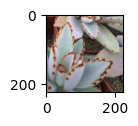

In [ ]:
img = io.imread('/content/drive/MyDrive/Colab Notebooks/report/pic1/a00001.jpg')
plt.figure(figsize=(1, 1))
plt.imshow(img)
img.shape

每次選擇一種seq

In [ ]:
# 100% horizontal flip
seq = iaa.Sequential([
    iaa.Fliplr(1), 
])

In [ ]:
seq = iaa.Sequential([
    iaa.Affine(
      rotate=(-20, 20)
      )
], random_order=True) # apply augmenters in random order

In [ ]:
# Strengthen or weaken the contrast in each image.
seq = iaa.Sequential([
    iaa.LinearContrast((1.5, 2.5))
])


In [ ]:
# Sharpen each image, overlay the result with the original
# image using an alpha between 0 (no sharpening) and 1
seq = iaa.Sequential([
    iaa.Sharpen(alpha=(0, 1.0), lightness=(0.85, 1.5))
])


In [ ]:
seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0.9, 2.0))
])


In [ ]:
# Same as sharpen, but for an embossing effect.
seq = iaa.Sequential([
    iaa.Emboss(alpha=(0.2, 1.0), strength=(0, 2.0))
])


In [ ]:
ia.seed(1)
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second image.
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Search in some images either for all edges or for
# directed edges. These edges are then marked in a black
# and white image and overlayed with the original image
# using an alpha of 0 to 0.7.
seq = iaa.Sequential([
    sometimes(iaa.OneOf([
      iaa.EdgeDetect(alpha=(0.2, 0.8)),
      iaa.DirectedEdgeDetect(alpha=(0.3, 0.8), direction=(0.3, 1.0))
    ]))
])


In [ ]:
fpath = "/content/drive/MyDrive/Colab Notebooks/report/"
fs = glob.glob(fpath+"pic1/*.*",)

i = 1
j = 830 #檔名接著之前的號碼
fchar = 'a' #檔名的開頭
for pics in fs:
  img = io.imread(pics)
  img_aug = seq.augment_image(img)
  pics1 = pics.split('/')
  num = int(pics1[len(pics1)-1][1:6])
  fpath1 = fpath+'/pic11/{}{:0>5d}.jpg'.format(fchar,num+j)
  io.imsave(fpath1,img_aug) 

  time.sleep(0.3)
  i += 1
  # plt.figure(figsize=(1, 1))
  # plt.imshow(img_aug)   
